In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/selmadoganata/classes/csc460/homework_4/twitchdata-update.csv")
df.head()


,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [3]:
df.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [5]:
# Summary statistics for numerical columns
# Define numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

summary_stats = df[numerical_columns].describe()

# Calculate outliers using the IQR method
outliers = {}
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers[col] = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][col]

print("Summary Statistics:\n", summary_stats)
print("\nOutliers by column:\n", outliers)


Summary Statistics:
        Watch time(Minutes)  Stream time(minutes)   Peak viewers  \
count         1.000000e+03           1000.000000    1000.000000   
mean          4.184279e+08         120515.160000   37065.051000   
std           5.496355e+08          85376.201364   60314.307686   
min           1.221928e+08           3465.000000     496.000000   
25%           1.631899e+08          73758.750000    9113.750000   
50%           2.349908e+08         108240.000000   16676.000000   
75%           4.337399e+08         141843.750000   37569.750000   
max           6.196162e+09         521445.000000  639375.000000   

       Average viewers     Followers  Followers gained  Views gained  
count      1000.000000  1.000000e+03      1.000000e+03  1.000000e+03  
mean       4781.040000  5.700541e+05      2.055185e+05  1.166817e+07  
std        8453.684965  8.044134e+05      3.399137e+05  2.490572e+07  
min         235.000000  3.660000e+03     -1.577200e+04  1.757880e+05  
25%        1457.7500

Categorical Bar Charts

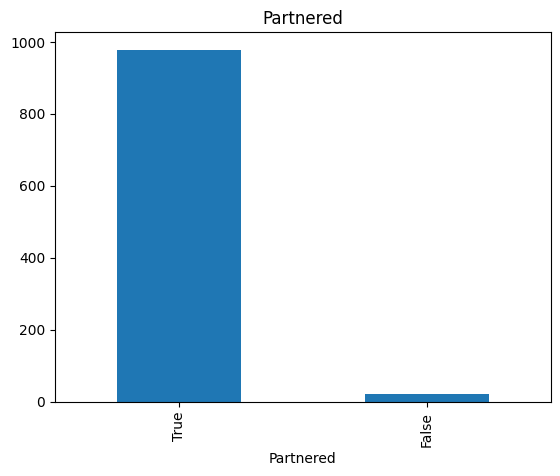

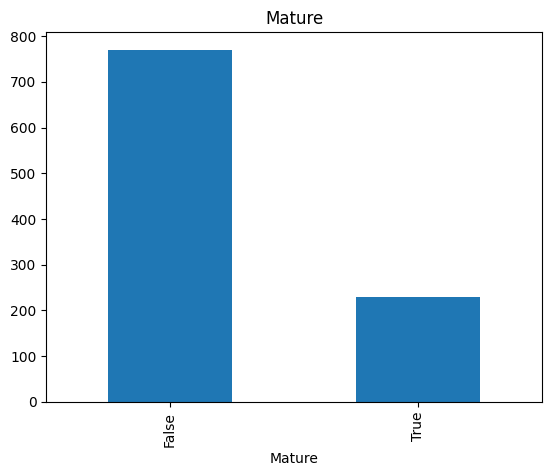

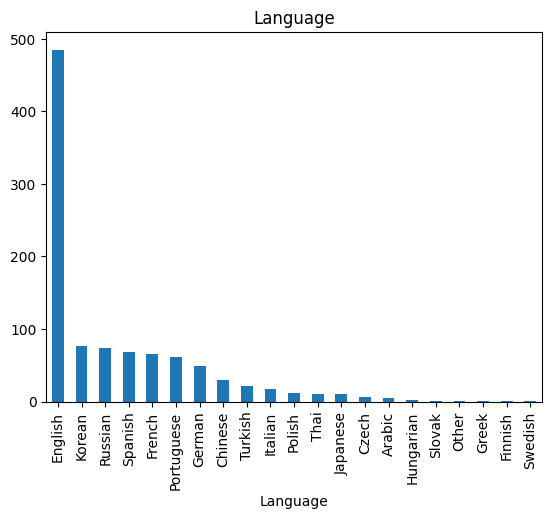

In [6]:
# Bar charts for categorical variables
categorical_columns = ['Partnered', 'Mature', 'Language']
for column in categorical_columns:
    df[column].value_counts().plot(kind='bar', title=column)
    plt.show()


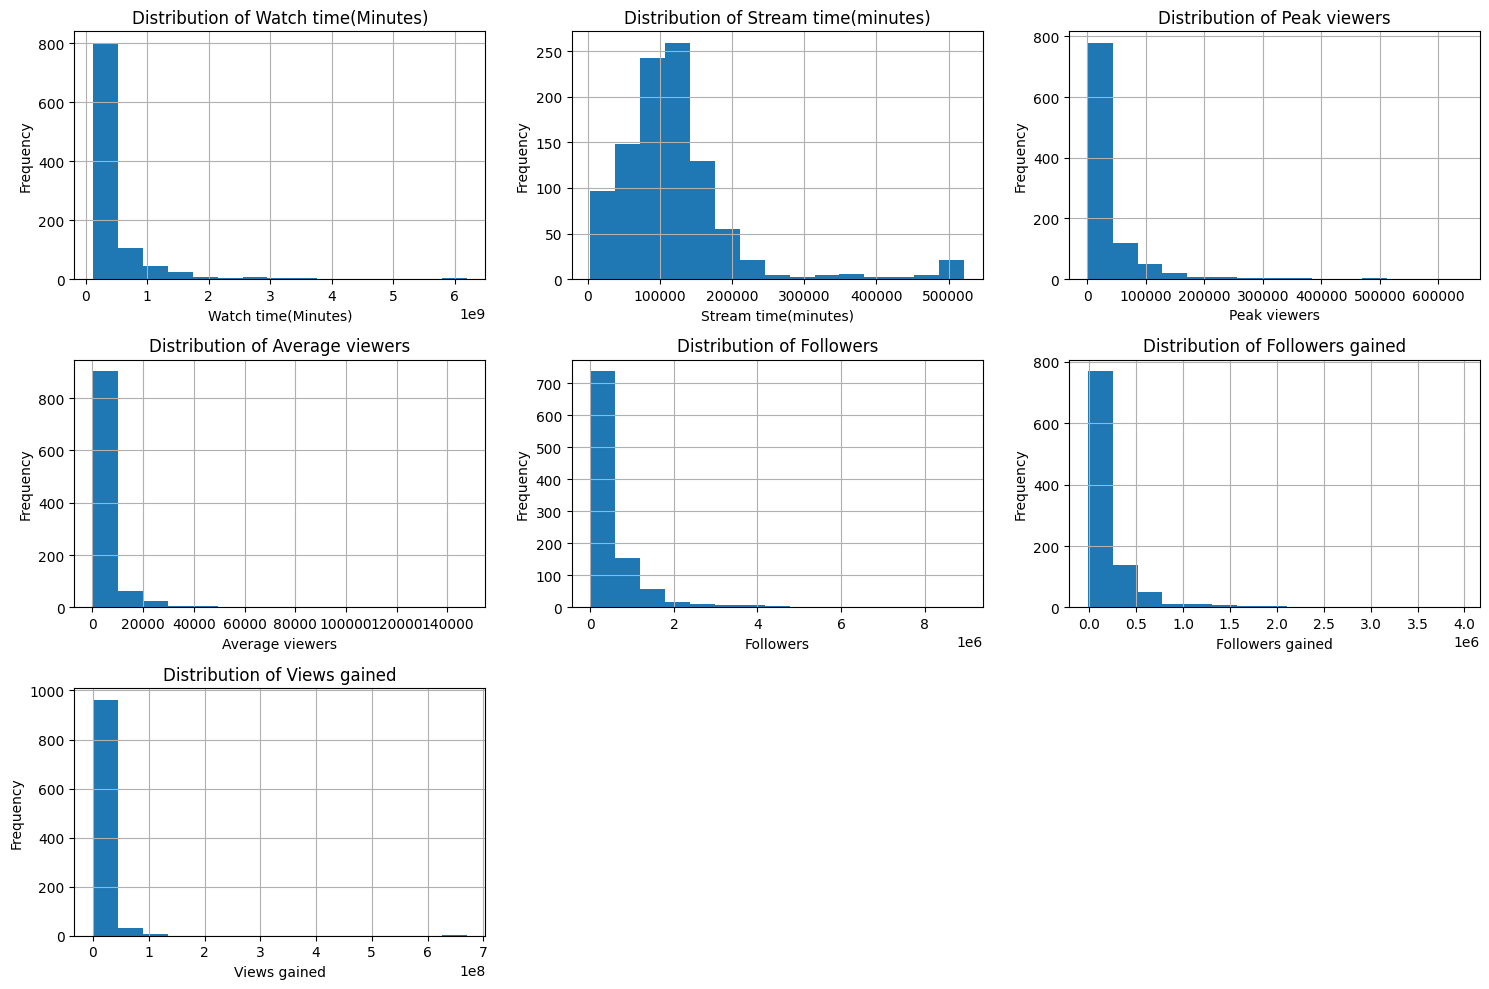

In [7]:

# Define the numerical columns you want to plot
numerical_columns = ['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 
                     'Average viewers', 'Followers', 'Followers gained', 'Views gained']

# Create a figure and axes for each histogram
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))  # Adjust layout based on number of variables
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

for i, column in enumerate(numerical_columns):
    df[column].hist(bins=15, ax=axes[i])  # Plot histogram in the i-th subplot
    axes[i].set_title(f'Distribution of {column}')  # Title for each subplot
    axes[i].set_xlabel(column)  # X-axis label for each subplot
    axes[i].set_ylabel('Frequency')  # Y-axis label for each subplot

# Hide any empty subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


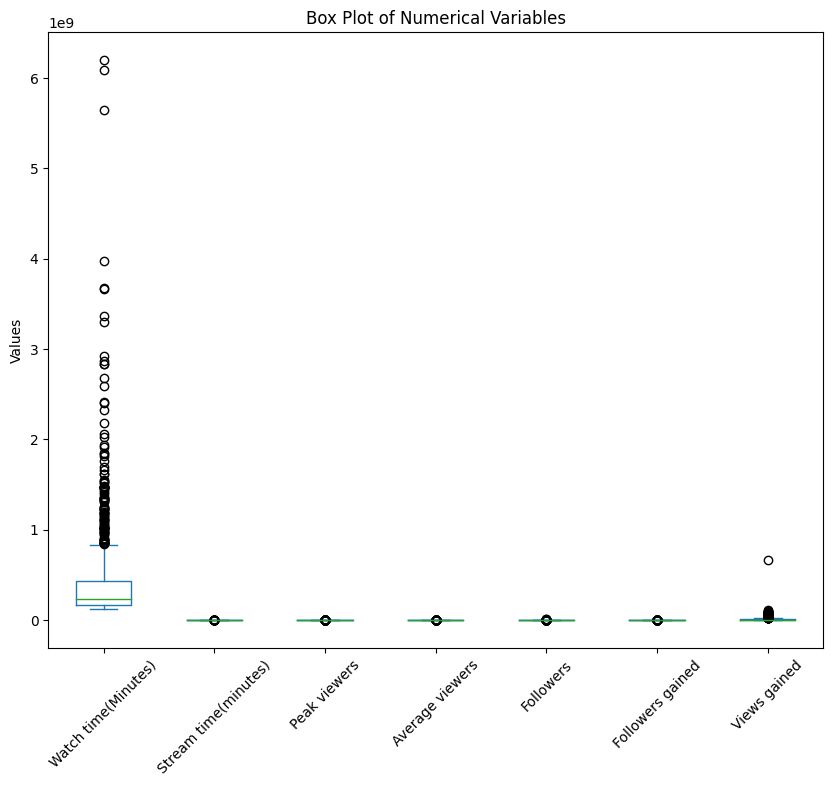

In [9]:

# Calculate Q1, Q3, IQR, and identify outliers
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = df[((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Plot the box plot with rotated x-axis labels
df[numerical_columns].plot(kind='box', figsize=(10, 8))
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.title("Box Plot of Numerical Variables")
plt.ylabel("Values")
plt.show()


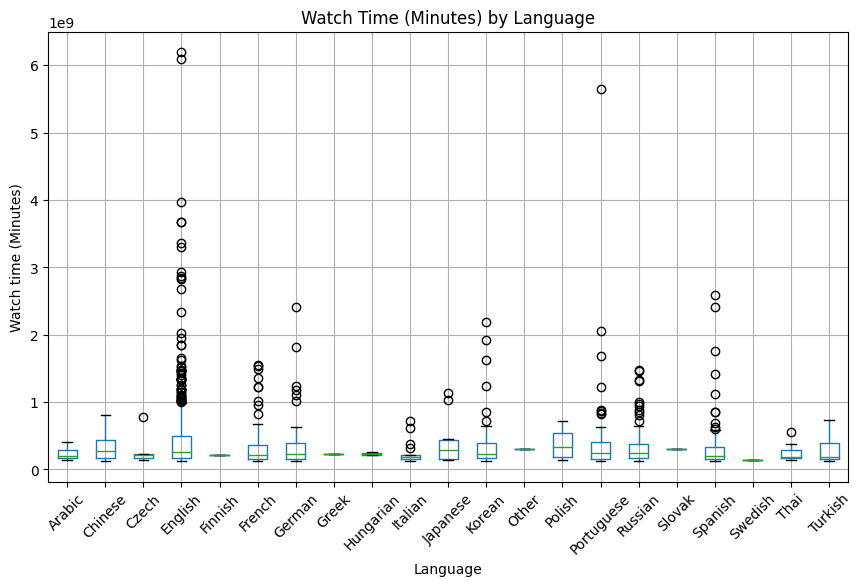

In [11]:
import matplotlib.pyplot as plt

# Create the box plot and rotate x-axis labels for readability
df.boxplot(column='Watch time(Minutes)', by='Language', figsize=(10, 6))
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.title("Watch Time (Minutes) by Language")
plt.suptitle("")  # Remove the automatic suptitle created by `boxplot` with `by`
plt.xlabel("Language")
plt.ylabel("Watch time (Minutes)")
plt.show()


In [ ]:
# Summary statistics for numerical columns
# Define numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

summary_stats = df[numerical_columns].describe()

# Calculate outliers using the IQR method
outliers = {}
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers[col] = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][col]

print("Summary Statistics:\n", summary_stats)
print("\nOutliers by column:\n", outliers)


Summary Statistics:
        Watch time(Minutes)  Stream time(minutes)   Peak viewers  \
count         1.000000e+03           1000.000000    1000.000000   
mean          4.184279e+08         120515.160000   37065.051000   
std           5.496355e+08          85376.201364   60314.307686   
min           1.221928e+08           3465.000000     496.000000   
25%           1.631899e+08          73758.750000    9113.750000   
50%           2.349908e+08         108240.000000   16676.000000   
75%           4.337399e+08         141843.750000   37569.750000   
max           6.196162e+09         521445.000000  639375.000000   

       Average viewers     Followers  Followers gained  Views gained  
count      1000.000000  1.000000e+03      1.000000e+03  1.000000e+03  
mean       4781.040000  5.700541e+05      2.055185e+05  1.166817e+07  
std        8453.684965  8.044134e+05      3.399137e+05  2.490572e+07  
min         235.000000  3.660000e+03     -1.577200e+04  1.757880e+05  
25%        1457.7500

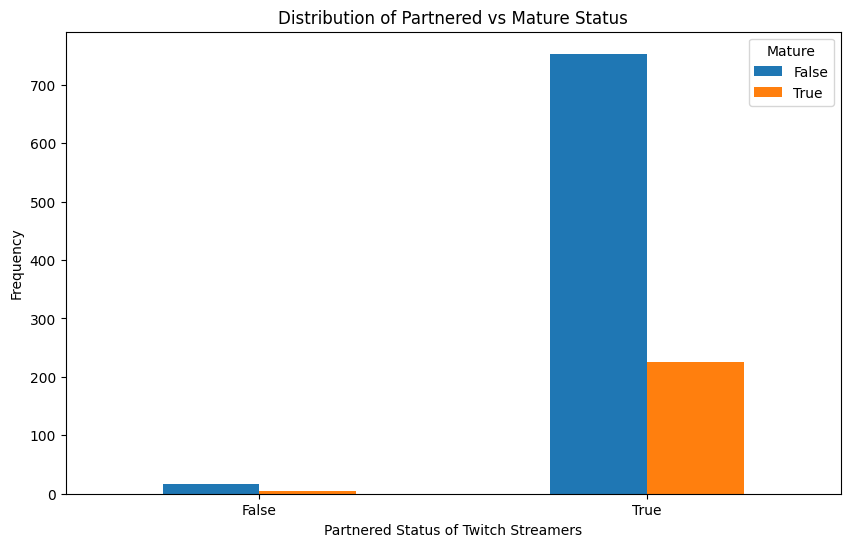

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Generate the crosstab and plot it as a bar chart
crosstab_plot = pd.crosstab(df['Partnered'], df['Mature']).plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel("Partnered Status of Twitch Streamers")
plt.ylabel("Frequency")  # Add label for the y-axis
plt.title("Distribution of Partnered vs Mature Status")
plt.xticks(rotation=0)  # Rotate x-axis labels if needed (0 keeps them horizontal)
plt.show()


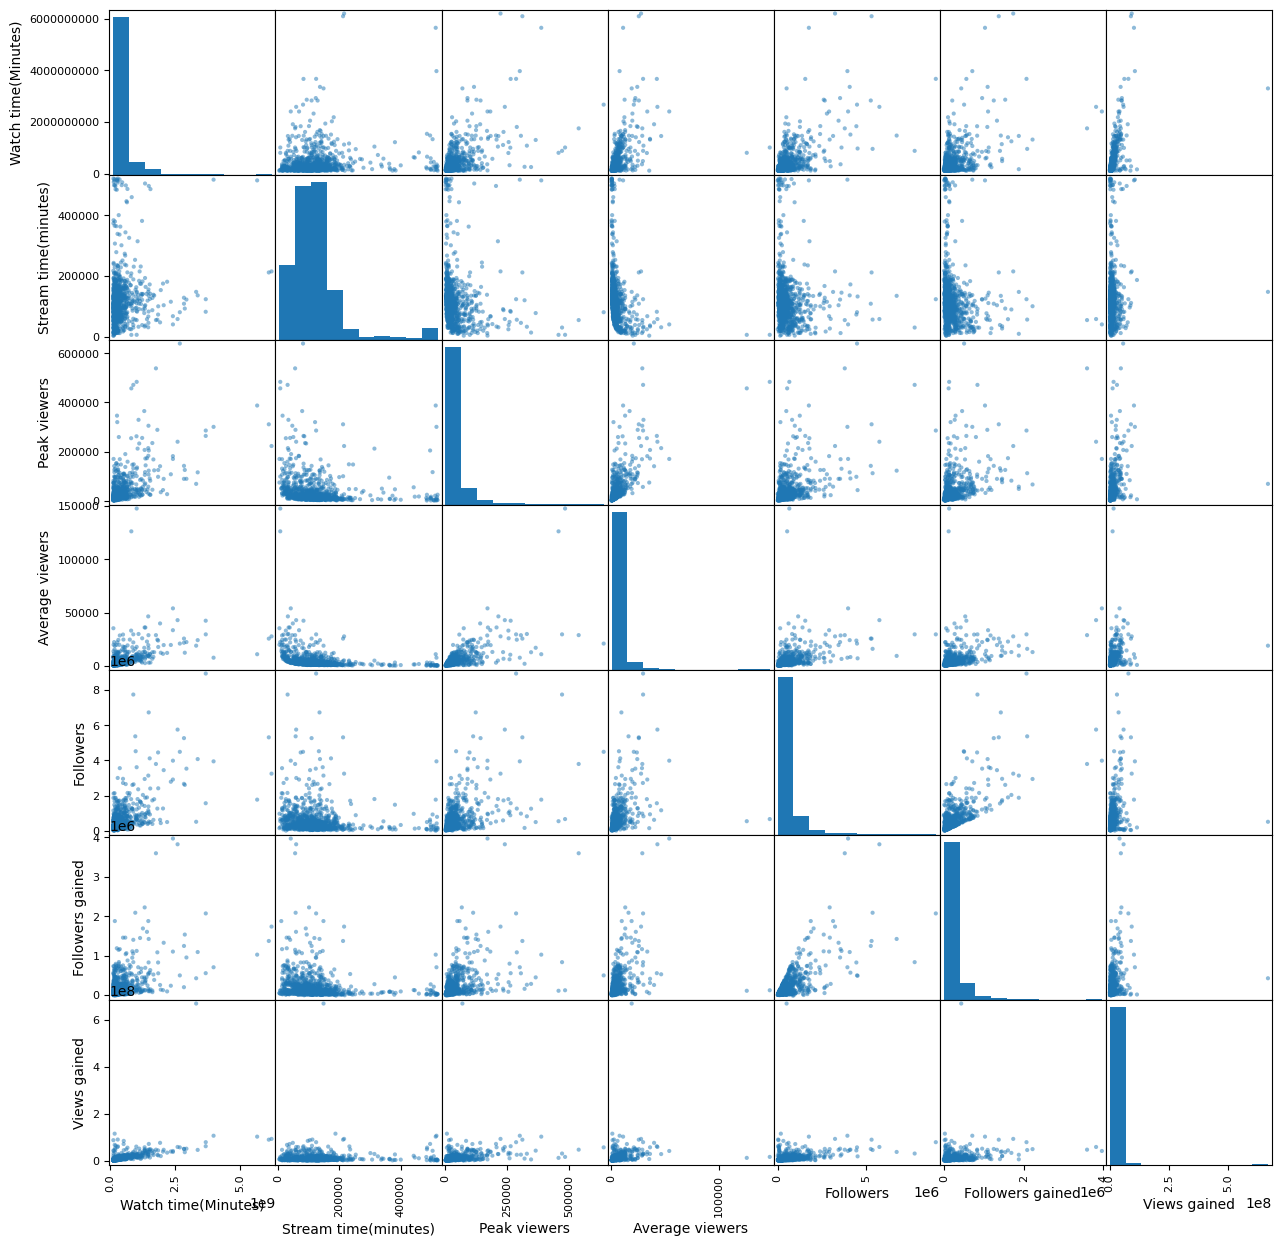

In [15]:
pd.plotting.scatter_matrix(df[numerical_columns], figsize=(15, 15))
plt.show()
